In [4]:
import pandas as pd
from ultralytics import YOLO
import supervision as sv

In [ ]:
import os
import shutil
import random

# Папка с исходными файлами
source_folder = r"dataset_txt"

# Папки для датасета
yolo_images_folder = os.path.join(source_folder, "images")
yolo_labels_folder = os.path.join(source_folder, "labels")
train_images_folder = os.path.join(source_folder, "train", "images")
train_labels_folder = os.path.join(source_folder, "train", "labels")
val_images_folder = os.path.join(source_folder, "val", "images")
val_labels_folder = os.path.join(source_folder, "val", "labels")

# Создаем папки, если они не существуют
os.makedirs(train_images_folder, exist_ok=True)
os.makedirs(train_labels_folder, exist_ok=True)
os.makedirs(val_images_folder, exist_ok=True)
os.makedirs(val_labels_folder, exist_ok=True)

# Сбор всех файлов изображений
image_files = [f for f in os.listdir(source_folder) if f.lower().endswith(".jpg")]
random.shuffle(image_files)

# Разделение на 80% train и 20% val
split_idx = int(len(image_files) * 0.8)
train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

# Функция для перемещения файлов
def move_files(file_list, src_folder, dst_images_folder, dst_labels_folder):
    for file in file_list:
        base_name = os.path.splitext(file)[0]
        image_path = os.path.join(src_folder, file)
        label_path = os.path.join(src_folder, base_name + ".txt")
        
        shutil.move(image_path, os.path.join(dst_images_folder, file))
        if os.path.exists(label_path):
            shutil.move(label_path, os.path.join(dst_labels_folder, base_name + ".txt"))

# Перемещение файлов в train и val
move_files(train_files, source_folder, train_images_folder, train_labels_folder)
move_files(val_files, source_folder, val_images_folder, val_labels_folder)

print("Датасет успешно разделен на train (80%) и val (20%) в формате YOLO!")


In [ ]:
data = {
    'train': 'dataset_txt/train/images',
    'val': 'dataset_txt/val/images',
    'nc': 1, 
    'names': ['1'],  
    'train_labels': 'dataset_txt/train/labels',
    'val_labels': 'dataset_txt/val/labels'
}

# Сохранение в YAML
import yaml
with open('yolo_config_fixed.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False, allow_unicode=True)

print("✅ YAML обновлен!")

In [ ]:
def train(model_name, data_yaml):
    model = YOLO(model_name)
    training_results = model.train(
        data=data_yaml,
        epochs=100, # число эпох для обучения
        imgsz=480, # размер изображения для обучения
        batch=16, # размер батча для обучения
        device=0, # номер девайса для обучения
        single_cls=False # для обучения с учетом классов на основании data.yaml
    )

In [ ]:
train("D:\\data science\\dron\\yolov8m.pt", "D:\\data science\\dron\\yolo_config_fixed.yaml")

In [5]:
model = YOLO(r'D:\data science\dron\runs\detect\train2\weights\best.pt')

In [6]:
result = model.predict(r"D:\data science\dron\dataset_txt\val\images")


image 1/272 D:\data science\dron\dataset_txt\val\images\0004.jpg: 320x480 1 1, 24.6ms
image 2/272 D:\data science\dron\dataset_txt\val\images\0005.jpg: 320x480 (no detections), 9.2ms
image 3/272 D:\data science\dron\dataset_txt\val\images\0008.jpg: 320x480 1 1, 4.7ms
image 4/272 D:\data science\dron\dataset_txt\val\images\0020.jpg: 480x480 1 1, 5.5ms
image 5/272 D:\data science\dron\dataset_txt\val\images\0030.jpg: 256x480 1 1, 36.4ms
image 6/272 D:\data science\dron\dataset_txt\val\images\0046.jpg: 288x480 1 1, 25.6ms
image 7/272 D:\data science\dron\dataset_txt\val\images\0048.jpg: 288x480 1 1, 5.0ms
image 8/272 D:\data science\dron\dataset_txt\val\images\0052.jpg: 288x480 1 1, 10.2ms
image 9/272 D:\data science\dron\dataset_txt\val\images\0061.jpg: 384x480 1 1, 31.2ms
image 10/272 D:\data science\dron\dataset_txt\val\images\0065.jpg: 384x480 1 1, 5.7ms
image 11/272 D:\data science\dron\dataset_txt\val\images\0070.jpg: 320x480 1 1, 11.6ms
image 12/272 D:\data science\dron\dataset_tx

In [7]:
img_masks = result[30].plot(boxes=True, labels=True) 

In [12]:
from PIL import Image

In [17]:
Image.fromarray(result[30].plot(boxes=True, labels=True)).save("img2354534.jpg")

In [1]:
img_masks

NameError: name 'img_masks' is not defined

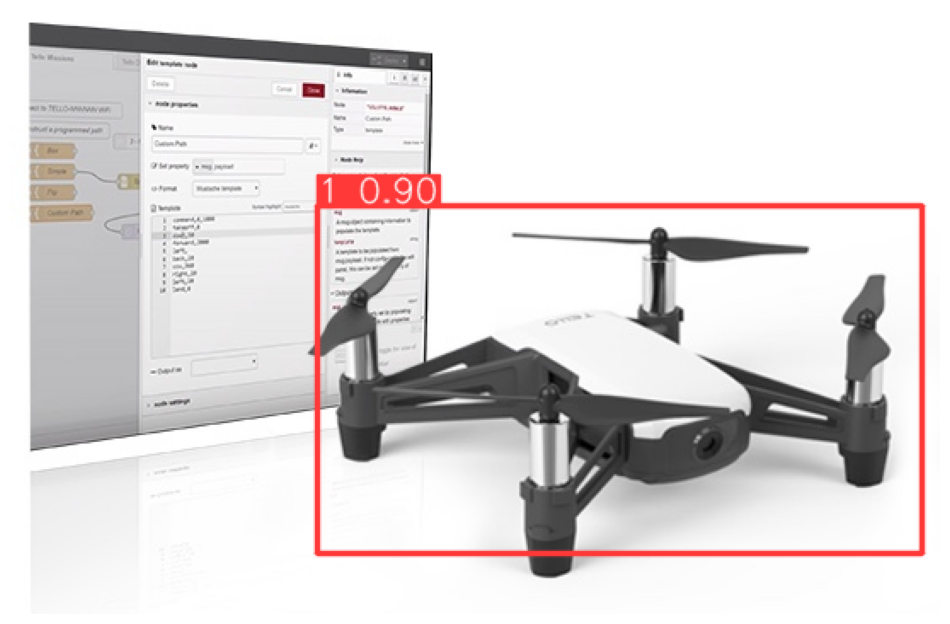

In [49]:
sv.plot_image(img_masks)